In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os


In [2]:
NAME = f'FINAL'

In [3]:
RESIZE_SIZE = 256
CROP_SIZE = 224

In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(RESIZE_SIZE),
        transforms.CenterCrop(CROP_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(), 
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(RESIZE_SIZE),
        transforms.CenterCrop(CROP_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

"""
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. 
The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].
"""


'\nAll pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. \nThe images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].\n'

In [5]:
data_dir = 'dataset'
# data_dir = 'data2_small'


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

In [6]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 3539, 'val': 489}


['alstonia_scholaris_diseased',
 'alstonia_scholaris_healthy',
 'arjun_diseased',
 'arjun_healthy',
 'bael_diseased',
 'basil_healthy',
 'chinar_diseased',
 'chinar_healthy',
 'gauva_diseased',
 'gauva_healthy',
 'jamun_diseased',
 'jamun_healthy',
 'jatropha_diseased',
 'jatropha_healthy',
 'lemon_diseased',
 'lemon_healthy',
 'mango_diseased',
 'mango_healthy',
 'pomegranate_diseased',
 'pomegranate_healthy',
 'pongamia_pinnata_diseased',
 'pongamia_pinnata_healthy']

In [7]:
model = models.resnet50(pretrained=True)


# RESNET
# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    elif "layer4" in name:
        param.requires_grad = True
    # elif "layer3" in name:
    #     param.requires_grad = True
    # elif "layer2" in name:
    #     param.requires_grad = True
    # elif "layer1" in name:
    #     param.requires_grad = True
    else:
        param.requires_grad = False
    print(name)
    # param.requires_grad = True



# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)


c:\Users\szymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\szymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.conv3.weight
layer1.0.bn3.weight
layer1.0.bn3.bias
layer1.0.downsample.0.weight
layer1.0.downsample.1.weight
layer1.0.downsample.1.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.conv3.weight
layer1.1.bn3.weight
layer1.1.bn3.bias
layer1.2.conv1.weight
layer1.2.bn1.weight
layer1.2.bn1.bias
layer1.2.conv2.weight
layer1.2.bn2.weight
layer1.2.bn2.bias
layer1.2.conv3.weight
layer1.2.bn3.weight
layer1.2.bn3.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.conv3.weight
layer2.0.bn3.weight
layer2.0.bn3.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.we

In [8]:
import datetime;
 
dt = datetime.datetime.now()
TIMESTAMP = f'{dt.day}{dt.month}_{dt.hour}{dt.minute}'

num_epochs = 100
FULLNAME = f'{NAME}{num_epochs}E_{TIMESTAMP}'


try: 
    os.mkdir('Models') 
except OSError as error: 
    print(error)     

[WinError 183] Nie można utworzyć pliku, który już istnieje: 'Models'


In [9]:
print(f'{num_epochs = }')

num_epochs = 100


In [10]:
# Training loop
list_epoch_loss_t = []
list_epoch_acc_t = []
list_epoch_loss_v = []
list_epoch_acc_v = []

BEST_ACC = 0

for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}.')
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        if phase == 'train':
            list_epoch_loss_t.append(epoch_loss)
            list_epoch_acc_t.append(float(f'{epoch_acc}'))
        else:
            list_epoch_loss_v.append(epoch_loss)
            list_epoch_acc_v.append(float(f'{epoch_acc}'))

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    
        # Save best models
        if phase == 'val':
            if BEST_ACC < epoch_acc:
                BEST_ACC = epoch_acc
                if BEST_ACC > 0.0:
                    val = F'{epoch_acc:.4f}'[2:]
                    localname = f'{NAME}E_{TIMESTAMP}_{val}'
                    torch.save(model.state_dict(), f'Models/{localname}.pth')
                    print(val)
        
print("Training complete!")


epoch: 1.
train Loss: 1.3765 Acc: 0.6310
val Loss: 0.6549 Acc: 0.8405
8405
epoch: 2.
train Loss: 0.6726 Acc: 0.7847
val Loss: 0.4276 Acc: 0.8937
8937
epoch: 3.
train Loss: 0.4956 Acc: 0.8457
val Loss: 0.3450 Acc: 0.9080
9080
epoch: 4.
train Loss: 0.3748 Acc: 0.8771
val Loss: 0.5413 Acc: 0.8793
epoch: 5.
train Loss: 0.3809 Acc: 0.8720
val Loss: 0.3087 Acc: 0.9223
9223
epoch: 6.
train Loss: 0.3275 Acc: 0.8938
val Loss: 0.3685 Acc: 0.9059
epoch: 7.
train Loss: 0.2816 Acc: 0.9135
val Loss: 0.4022 Acc: 0.8793
epoch: 8.
train Loss: 0.2330 Acc: 0.9229
val Loss: 0.4075 Acc: 0.9100
epoch: 9.
train Loss: 0.2272 Acc: 0.9248
val Loss: 0.3903 Acc: 0.9100
epoch: 10.
train Loss: 0.1847 Acc: 0.9347
val Loss: 0.3520 Acc: 0.9100
epoch: 11.
train Loss: 0.1900 Acc: 0.9392
val Loss: 0.5360 Acc: 0.8937
epoch: 12.
train Loss: 0.1440 Acc: 0.9520
val Loss: 0.3430 Acc: 0.9182
epoch: 13.
train Loss: 0.1284 Acc: 0.9599
val Loss: 0.3740 Acc: 0.9080
epoch: 14.
train Loss: 0.1264 Acc: 0.9559
val Loss: 0.4712 Acc: 0.

In [11]:

# Save the model
torch.save(model.state_dict(), f'Models/{FULLNAME}.pth')


Train Loss: [1.3764733398224245, 0.6725527702349939, 0.4955626308451417, 0.3747980525554243, 0.380942138011456, 0.3274864050860919, 0.2816421259274054, 0.23299114400406512, 0.22721634354171238, 0.18465670737789122, 0.19001884250314957, 0.14397339761996586, 0.12842717845267698, 0.12643948713131928, 0.14518089763701486, 0.10036191099549682, 0.11564191129967545, 0.10650280497449821, 0.10907754894389354, 0.09209031312396732, 0.08772057758216041, 0.06810181351147201, 0.07374364694439571, 0.07650009559813128, 0.06692189292967837, 0.05985546732846474, 0.05060577774775914, 0.047338943450826586, 0.05014841141696255, 0.06104239691833082, 0.04436906084531283, 0.04503014010225944, 0.05694127106369646, 0.0472080762725127, 0.048426631824735875, 0.049192742529578795, 0.05059504267622188, 0.04255685651819434, 0.04447604037478519, 0.03370290435940002, 0.04590331361028431, 0.054724253779219766, 0.031094486592894648, 0.0323416626538173, 0.03914113477033325, 0.03450726359591829, 0.03432543062697375, 0.022

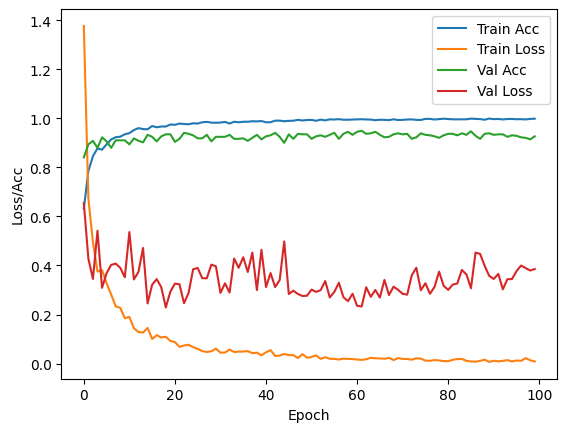

In [12]:
import matplotlib.pyplot as plt
import numpy as np

print(f"Train Loss: {list_epoch_loss_t}")
print(f"Train Acc: {list_epoch_acc_t}")
print(f"Val Loss: {list_epoch_loss_v}")
print(f"Val Acc: {list_epoch_acc_v}")

file = open(f"Models/{FULLNAME}.txt", "a")
file.write(f"Train Loss: {list_epoch_loss_t}\n")
file.write(f"Train Acc: {list_epoch_acc_t}\n")
file.write(f"Val Loss: {list_epoch_loss_v}\n")
file.write(f"Val Acc: {list_epoch_acc_v}\n")
file.close()

plt.figure()
plt.plot(list_epoch_acc_t, label='Train Acc')
plt.plot(list_epoch_loss_t, label='Train Loss')
plt.plot(list_epoch_acc_v, label='Val Acc')
plt.plot(list_epoch_loss_v, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss/Acc')
plt.legend()

plt.savefig(f'Models/{FULLNAME}.png')